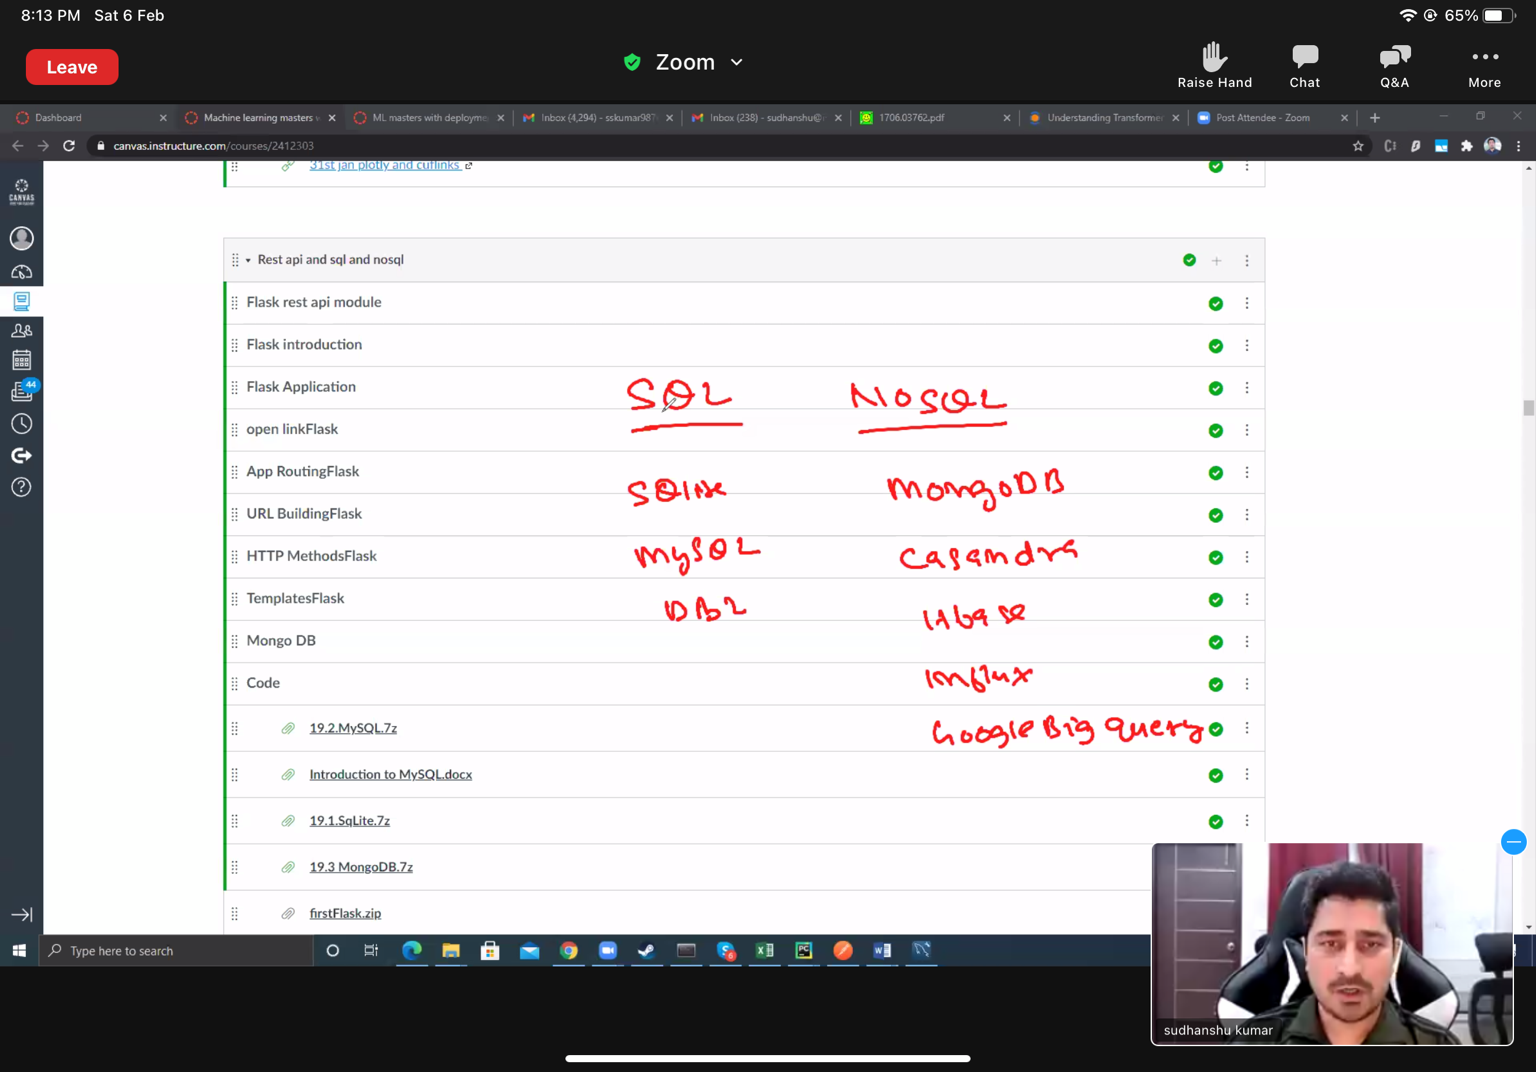

In [1]:
# No SQL --> Not only SQL

In [2]:
import mysql.connector as connection   ## If no issue, it Indicates that the driver is installed 

In [6]:
## mydb is an instance [python -- connect -- MYsql]
mydb = connection.connect(host='localhost', user='root' , passwd="1234", use_pure=True)    # host --> can give the url of the server also
print(mydb.is_connected())   ## returns true, if the python and mysql data-bases are connected
mydb.close()  # closing the connection

True


In [9]:
import mysql.connector as connection
try:
    mydb = connection.connect(host='localhost',user='root',passwd='1234',use_pure=True)
    print(mydb.is_connected())
    mydb.close()
except Exception as e:
    print(str(e))

1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


In [11]:
## What happens on giving wrong password
import mysql.connector as connection
try:
    mydb = connection.connect(host='localhost',user='root',passwd='podangu',use_pure=True)
    print(mydb.is_connected())
    mydb.close()
except Exception as e:
    print(str(e))

1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)


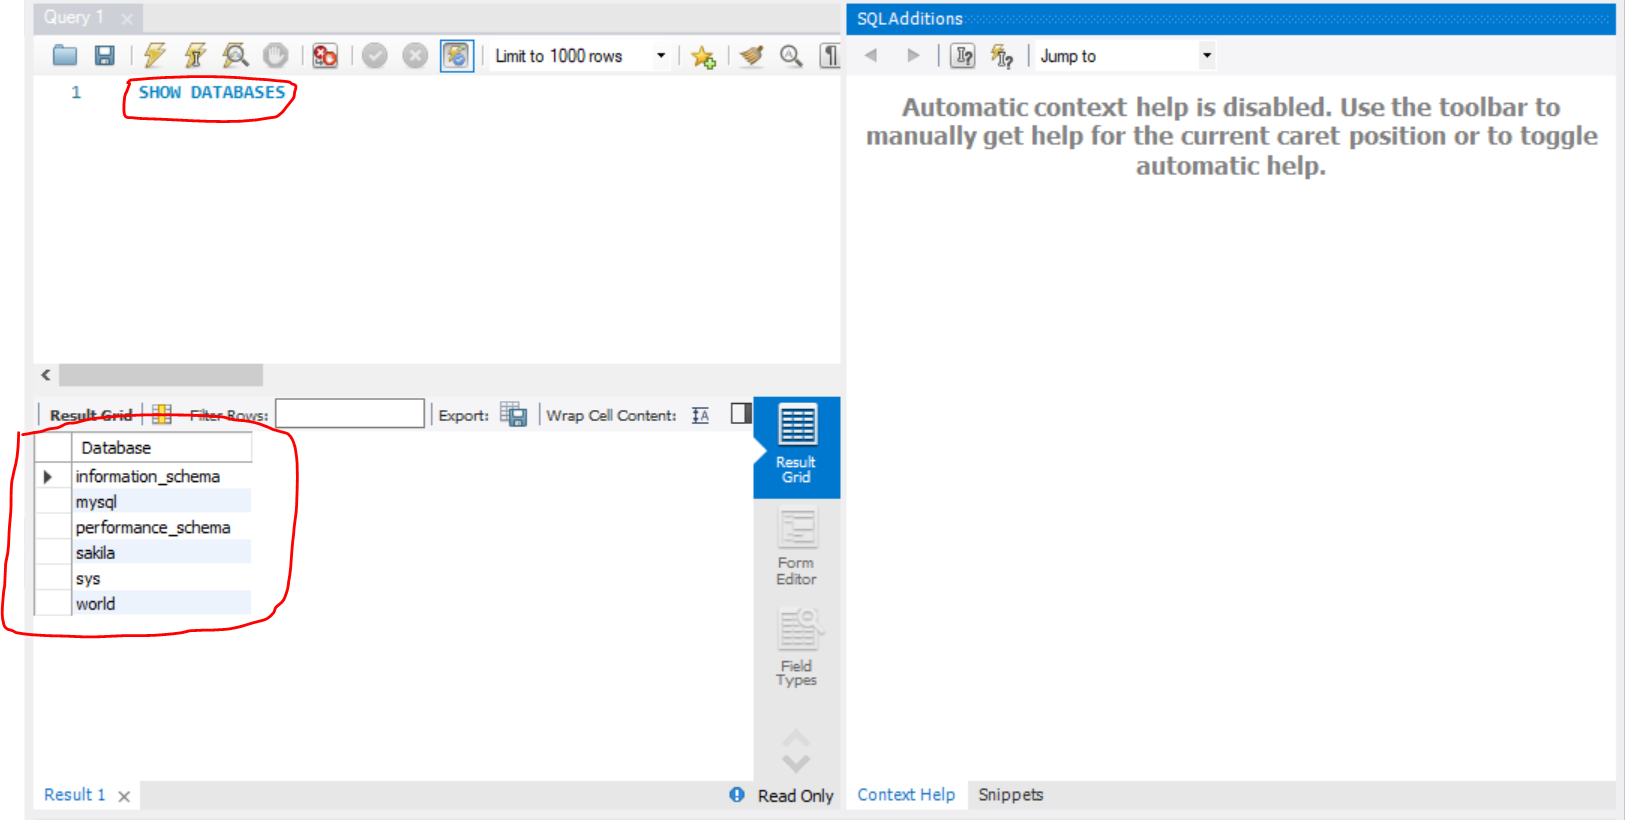

In [12]:
## Now we want to execute this command from python

In [53]:
mydb = connection.connect(host='localhost',user='root',passwd='1234',use_pure=True)

cursor = mydb.cursor()   ## Creating a cursor to execute the query, which will be starting from the top left margin

query = 'SHOW DATABASES'         ## Creating a query
cursor.execute(query)                   ## Executing the query
output = cursor.fetchall()              ## Fetching the output, which is list of tuples 

In [54]:
print(type(cursor.execute(query)))

<class 'NoneType'>


In [55]:
print(output)

[('information_schema',), ('mysql',), ('performance_schema',), ('sakila',), ('sample1',), ('sys',), ('world',)]


In [16]:
for i in output:
    print(i[0])

information_schema
mysql
performance_schema
sakila
sys
world


In [19]:
try:
    mydb = connection.connect(host="localhost",user="root", passwd="1234",use_pure=True)
    # check if the connection is established

    query = "SHOW DATABASES"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print(cursor.fetchall())

except Exception as e:
    mydb.close()
    print(str(e))

[('information_schema',), ('mysql',), ('performance_schema',), ('sakila',), ('sys',), ('world',)]


### Creating a new data-base

In [21]:
mydb = connection.connect(host="localhost",user="root", passwd="1234",use_pure=True)
if mydb.is_connected():
    query = 'Create database sample1;'
    cursor = mydb.cursor()  ## Creating a cursor, to execute the query
    cursor.execute(query)
    print("Data-Base is created is successfully")

Data-Base is created is successfully


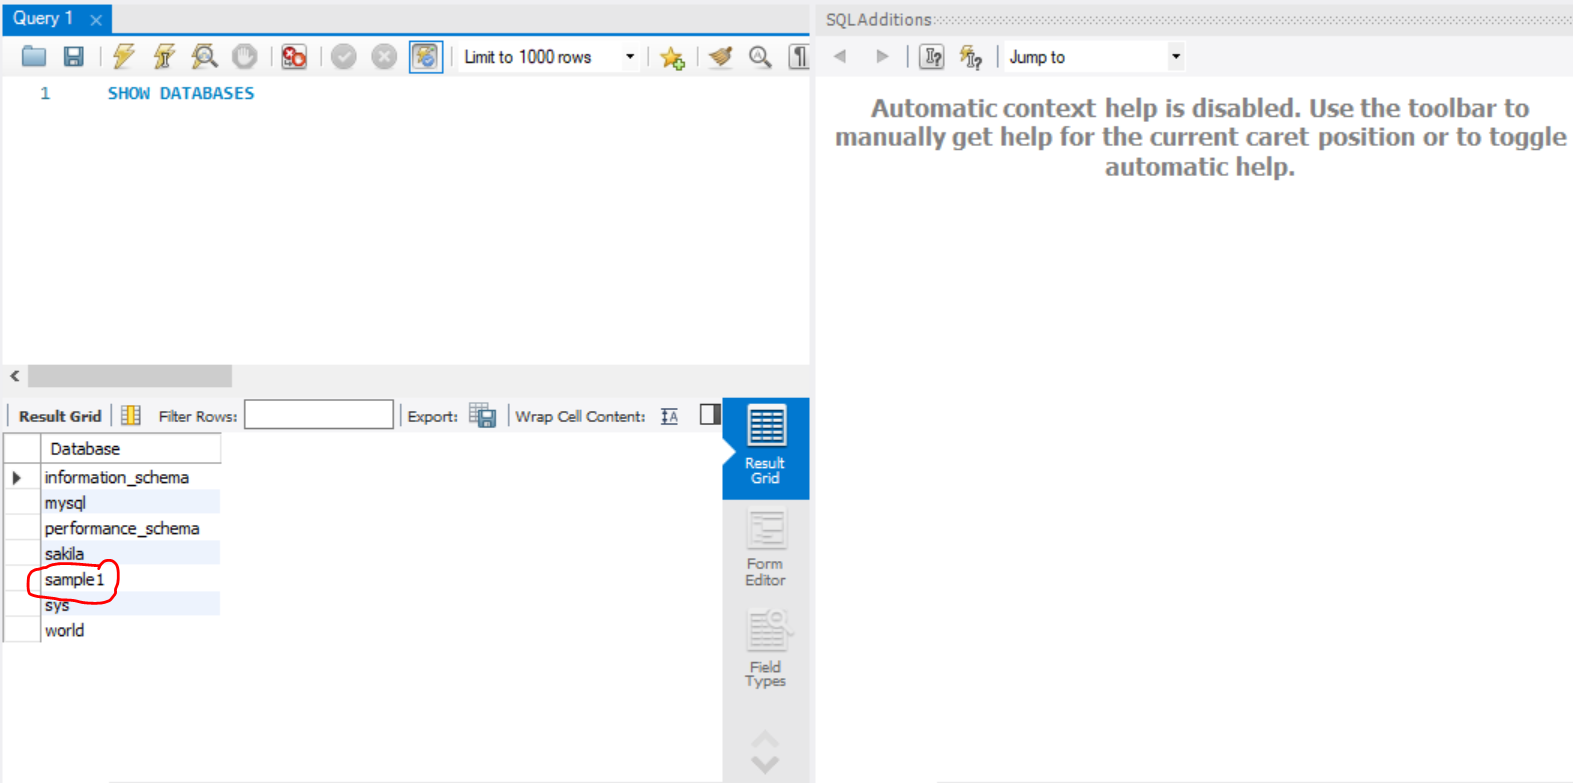

In [28]:
mydb = connection.connect(host='localhost',user='root',passwd='1234',use_pure=True)

cursor = mydb.cursor()   ## Creating a cursor to execute the query, which will be starting from the top left margin

query = 'SHOW DATABASES'         ## Creating a query
cursor.execute(query)                   ## Executing the query
output = cursor.fetchall()              ## Fetching the output, which is list of tuples 

In [49]:
output

[('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sample1',),
 ('sys',),
 ('world',)]

In [48]:
for i in output:
    if 'sample1' in i[0]:
        print('sample1 data-base is present')

sample1 data-base is present


In [50]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", user="root", passwd="1234",use_pure=True)
    print(mydb.is_connected())   # check if the connection is established

    query = "Create database sample1;"
    cursor = mydb.cursor()         # create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
1007 (HY000): Can't create database 'sample1'; database exists


In [ ]:
## Can't create sample1, since it is already created 

## Table creation

In [57]:
mydb = connection.connect(host="localhost", user="root",database='sample1' ,passwd="1234",use_pure=True)  ## data-base name should be mentioned clearly 
print(mydb.is_connected())   # check if the connection is established

query = "CREATE TABLE studentdetails (studentid INT(10) AUTO_INCREMENT PRIMARY KEY,"\
                                                                       "firstname VARCHAR(60)," \
                                                                        "lastname VARCHAR(60) , "\
                                                                        "registration_date DATE, "\
                                                                        "class VARCHAR(60), "\
                                                                        "section VARCHAR(60))"

cursor = mydb.cursor()
cursor.execute(query)
print("Table is created successfully")
mydb.close()

True
Table is created successfully


## Inserting the values into the table

In [58]:
try:
    mydb = connection.connect(host="localhost", user="root",database='sample1' ,passwd="1234",use_pure=True)  ## data-base name should be mentioned clearly 
    query = "INSERT INTO studentdetails VALUES ('1','Prashanth','Singaravelan','2001-4-24','1st standard','A')"

    cursor = mydb.cursor()
    cursor.execute(query)
    print("values are eneterd into the table")
    mydb.commit()
    mydb.close()

except Exception as e:
    mydb.close()
    print(str(e))

values are eneterd into the table


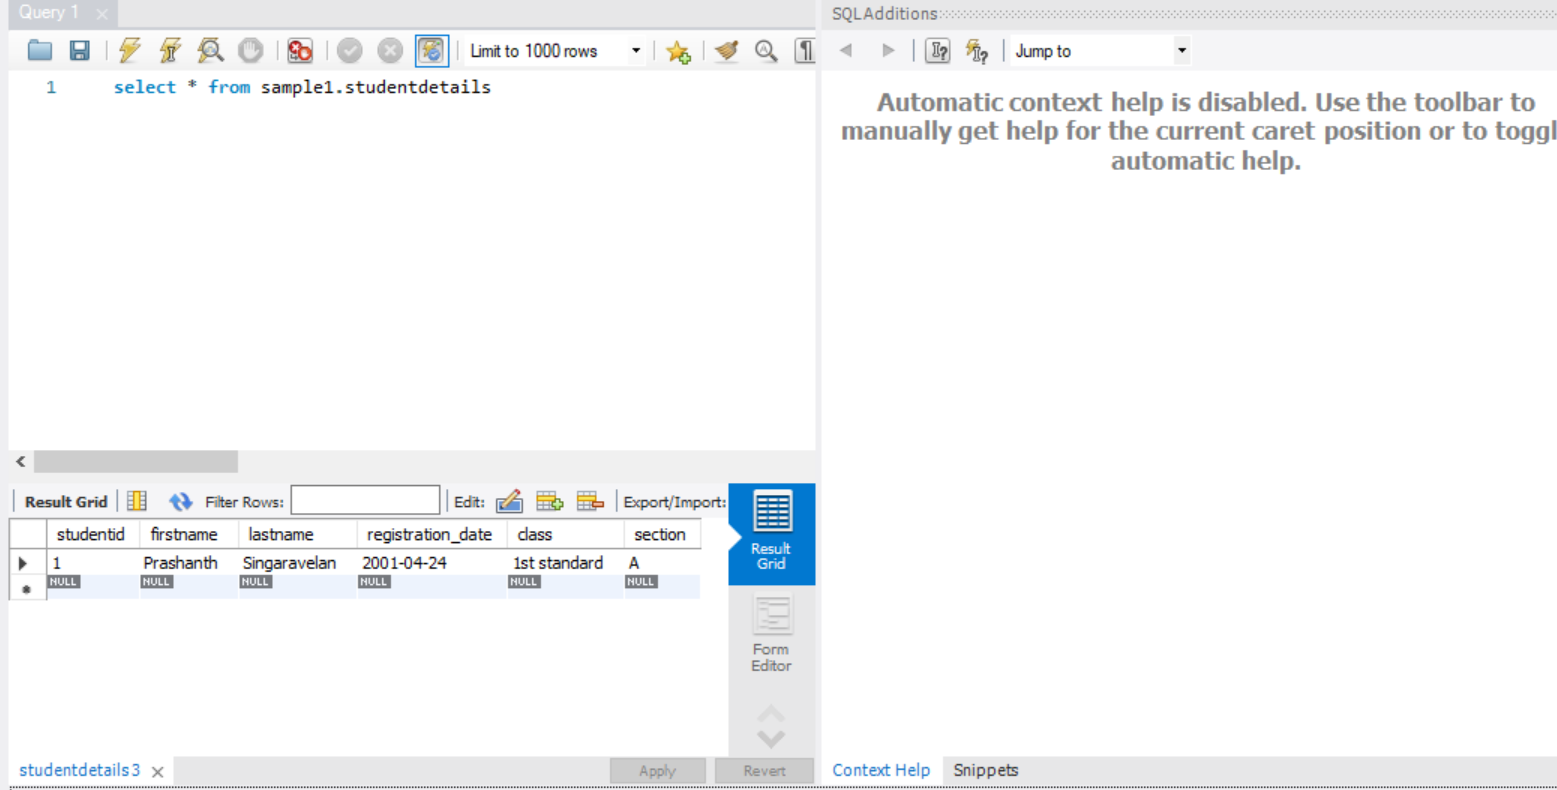

In [59]:
try:
    mydb = connection.connect(host="localhost", user="root",database='sample1' ,passwd="1234",use_pure=True)  ## data-base name should be mentioned clearly 
    query = "INSERT INTO studentdetails VALUES ('1','Mothish','D','2001-4-24','1st standard','A')"

    cursor = mydb.cursor()
    cursor.execute(query)
    print("values are eneterd into the table")
    mydb.commit()
    mydb.close()

except Exception as e:
    mydb.close()
    print(str(e))

1062 (23000): Duplicate entry '1' for key 'studentdetails.PRIMARY'


In [60]:
## Primary keys can't be same

In [63]:
mydb = connection.connect(host="localhost", user="root",database='sample1' ,passwd="1234",use_pure=True)  ## data-base name should be mentioned clearly 
query = "select * from studentdetails;"

cursor = mydb.cursor()
cursor.execute(query)
output = cursor.fetchall()

In [64]:
for i in output:
    print(i)

(1, 'Prashanth', 'Singaravelan', datetime.date(2001, 4, 24), '1st standard', 'A')
